# TP5: Procesamiento de datos de sRNA-seq

**Nota**: Este cuaderno asume que el [TP0](https://colab.research.google.com/github/VeronicaNoe/EpiEvo/blob/main/cuadernos/TP0_espacio_de_trabajo.ipynb) ha sido completado con éxito.


# Contenido

**Objetivo:** Familiarizarse con la identificación de pequeños RNAs utilizando datos de secuenciación de _Solanum kurztianum_.

<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura00_ktz.png" width="400"/> 
</p>

0.   [Introducción](#step-0)
1.   [Preparación del cuaderno](#step-1)
2.   [Preparación del espacio de trabajo en R](#step-2)
3.   [Análisis de datos obtenidos por *sRNAs*](#step-3)
  1.   [Análisis de 21-22 nts](#step-3.1)
  2.   [Análisis de 24 nts](#step-3.2)
  3.   [Exploramos los datos](#step-3.3)
4.   [OPCIONAL: Guardar en Drive](#step-4)



<a name="step-0"></a>
# Introducción


Analizaremos los perfiles de acumulacion de pequenos RNAs (sRNAs) obtenidos a partir de clones de la papas silvestres _Solanum kurtzianum_ que fueron cultivadas dentro de la Reserva Natural Villavicencio (Mendoza) en dos jardines experimentales ubicados a distintas altitudes (1200 msnm. vs 2200 msnm; [Ibañez et al., 2020](https://www.nature.com/articles/s41437-020-00355-z.epdf?sharing_token=dG8zGO7n_Ce5emTXQ08extRgN0jAjWel9jnR3ZoTv0MCUs3YZTqBQIBls0HDBuh1-MhUNe_GoS8CV-HVB4GfcBsumY1HfytV9uB0svFhDZGCFxWehIn4QPwKajc_gzFNadchnJz5CySlKFg47-IY4E559lTGc6ho1DEYNprkyCA%3D)). 

Este gradiente altitudinal genera diferencias en los niveles de radiacion UV-B (10%) y en las temperaturas medias (35%). Se observaron diferencias morfologicas, productivas y quimicas incluyendo aumentos en area folear, numero y tamano de tuberculos en las plantas crecidas a 2200 mts vs. las crecidas a 1200 mts. 

El material vegetal consta de 3 réplicas biológicas para cada jardin experimental las cuales denominamos:

**2S, 7S, 18S** para el jardin **S** a **1200 msnm**

**4A, 8A, 12A** para el jardin **A** a **2200 msnm**

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/TP_05_A.
png" width="600"/> 
</p>

Los sRNAs fueron separados por tamaño según su biogénesis y modo de acción **(21-22nt)** y **(24nt)** y serán analizados los perfiles de acumulación diferencial **(DA)** entre los dos ambientes asociándolos a dos tipos de regiones genómicas o "features". 


Por un lado exploraremos el perfil de sRNAs de 21-22nt asociados a RNAs mensajeros (mRNAs) entre ambas condiciones.

Por otro lado analizaremos el perfiles de sRNAs de 24nt asociados a promotores entre ambas condiciones.

## Clasificación y función de sRNAs en plantas

Las principales clases de sRNAs en plantas son los **miRNAs**, los **siRNAs secundarios** (21-22nt) y los **hetsiRNAs** de 24nt:

- Los `miRNAs` estan involucrados en el silenciamiento post transcripcional (PTGS) mediante el corte de transcriptos y por represion traduccional.
- Los `siRNAs` secundarios tambien estan involucrados en el corte o represion traduccional de genes targets en *cis* o en *trans* pero tienen otras vias de biogenesis. A su vez pueden iniciar silenciamiento traduccional (TGS) mediante la metilacion del ADN.
- Los `hetsiRNAs` estan involucrados en el silenciamiento de regiones repetitivas, transposones y promotores mediante el mecanismo de metilacion del ADN dirijido por ARNs (RdDM).

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura0.png" width="500"/> 
</p>

## sRNA-Seq


## 1. Preparación de las muestras

Se extrae el RNA total, se corre en un gel de poliacrilamida, se selecciona y corta por tamaño.

(figura1)
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="300"/> 
</p>



##2. Preparación de las bibliotecas

Se utilizan kits comerciales especificos para cada tipo de experimento para el armado de las bibliotecas, las cuales constan de el pegado de adaptadores específicos, la retrotranscripción del ARN a ADN y la amplificación por PCR.

(figura1 y 2)
<div id="image-table">
    <table>
      <tr>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="400"/> 
            <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura2.png" width="400"/> 
            </td>
        </tr>
    </table>
</div> 



##3. Secuenciación

Se utilizan secuenciadores de alta procesividad (NGS) (generalmente Illumina) los cuales varian segun las necesidades de profundidad de secuenciación que se requiera para cada experimetno

(figura1, 2 y 3)
<div id="image-table">
    <table>
      <tr>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="600"/> 
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura2.png" width="600"/>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura3.png" width="600"/> 
            </td>
        </tr>
    </table>
</div> 




##4. Análisis bioinformáticos

Se utilizan "pipelines" bioinformáticas que contan de diversos pasos: principalmente del control de calidad de las secuencias y remoción de adaptadores, mapeo de las "reads" al genoma de referencia, obtención de una matriz de conteos y analisis de expresión (o acumulación) diferencial entre distintas condiciones o tratamientos

(figura1, 2, 3 y 4)
<div id="image-table">
    <table>
      <tr>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura1.png" width="600"/> 
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura2.png" width="600"/>
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura3.png" width="600"/> 
          <td style="padding:10px">
              <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura4.png" width="600"/> 
            </td>
        </tr>
    </table>
</div> 


## Pipeline bioinformática
#### 4.1. Raw data

(figura5)
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura5.png" width="600"/> 
</p>

Comparación de datos crudos de sRNA-seq vs. RRBS

(figura6)
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura6.png" width="1200"/> 
</p>


#### 4.2. Control de calidad, remocion de adaptadores y filtrado por tamaño

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura7.png" width="500"/> 
</p>

Ejemplo de código utilizado:

```
java -jar /Documents/software/Trimmomatic-0.36/trimmomatic-0.36.jar SE -phred33 -threads 12 sar395-2019_S1_001.fastq.gz sar395-2019_S2_001.fastq.gz sar395-2019_S3_001.fastq.gz 1-2S_trimmed.fastq.gz 1-7S_trimmed.fastq.gz 1-18S_trimmed.fastq.gz ILLUMINACLIP:/home/diego/Documents/software/Trimmomatic-0.36/adapters/TruSeq3-SE.fa:2:30:5 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:20 MINLEN:18
```



Ejemplo de código utilizado:

* filtro 21-22 nt

```
awk 'BEGIN {OFS = "\n"} {header = $0 ; getline seq ; getline qheader ; getline qseq ; if (length(seq) >= 21 && length(seq) <= 22) {print header, seq, qheader, qseq}}' < 1-2S_trimmed.fastq > 1-2S_21-22nt.fq
```

* filtro 24 nt

```
awk 'BEGIN {OFS = "\n"} {header = $0 ; getline seq ; getline qheader ; getline qseq ; if (length(seq) >= 24 && length(seq) < 25) {print header, seq, qheader, qseq}}' < 1-2S_trimmed.fastq > 1-2S_24nt.fastq
```


### 3. Mapeo al genoma de referencia de las reads

Se utilizará el software [**ShortStack**](https://github.com/MikeAxtell/ShortStack) basado en el artículo [Johnson et al., 2016](https://academic.oup.com/g3journal/article/6/7/2103/6027713?login=true)

<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura8_B.png" width="800"/> 
</p>

### Fig.A
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura9.png" width="800"/> 
</p>

### Fig.B
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura10.png" width="800"/> 
</p>

### Fig.C
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura11.png" width="800"/> 
</p>

### Fig.D
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura12.png" width="800"/> 
</p>

### Fig.E
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura13.png" width="800"/> 
</p>

### Fig.F
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura14.png" width="800"/> 
</p>


Ejemplo de código de utilizado para el mapeo:


```
ShortStack --readfile 1-2S_21-22nt.fq --genomefile Solanum_tuberosum.fa --bowtie_cores 14 --mmap u --locifile Solanum_tuberosum_gene.tab --outdir ./1200mts_mRNA/1-2S_21-22nt/
```







### Exploramos la salida:

OUTPUT FILES


Todos los archivos se guardan en una carpeta creada por ShortStack que se especifica al correrlo con la opcion `--outdir`

* **Log file**

    Escribe y graba los pasos de la corrida.

* **ErrorLogs**
    
    Escribe los posibles errores que hayan surgido durante la corrida.

* **Results file**
    
    *Results.txt* es un archivo de texto plano delimitado por tab que contiene los resultados del analisis. Las principales columnas contienen los datos de:



    1. Locus: Coordinates of the locus in format Chr:Start-Stop

    2. Name: Name of the locus

    3. Length: Length of the locus (nts)

    4. Reads: Total number of primary alignments in the locus

    5. RPM: Total number of primary alignments normalized to reads per
    million. Note the the normalization factor includes all primary
    alignments .. both mapped and unmapped.

    6. UniqueReads: Number of uniquely aligned primary alignments in locus.

    7. FracTop: Fraction of primary alignments aligned to the top genomic
    strand

    8. Strand: Strand call for the locus

    9. MajorRNA: Most abundant RNA at locus. In cases of tie, MajorRNA is
    arbitrarily chosen from the tied entries.

    10. MajorRNAReads: Number of primary alignments for the MajorRNA.

    11. Complexity: A number >0 and <= 1 that reflects the complexity of
    small RNA production from the locus. Defined by
    (n_distinct_read_sequences) / (abundance of all reads). Lower numbers
    indicate loci that are more dominated by a single highly abundant RNA.

    12. DicerCall: If >= 80% of the primary alignments were reads >=
    dicermin and <= dicermax, DicerCall is a number that indicates the
    predominant size of the RNA population from the locus. If the 80%
    threshold was not met, then DicerCall is N instead. Can also be NA if
    the locus had no aligned reads.

    13. MIRNA: Results of MIRNA analysis. Codes starting with N indicate not
    a MIRNA, Y means yes. See above for full description of codes.

    14. PhaseScore: Phasing score for a phase size of 21 or 24nts according
    to a modified version of equation 3 of Guo et al (2015) doi:
    10.1093/bioinformatics/btu628. If the locus had a DicerCall of 21, phase
    score is for a 21 nt phasing register. If the locus had a DicerCall of
    24, the phase score is for a 24 nt phasing register. See above for full
    description of phasing analysis.

    15. Short: Number of primary alignments that were shorter than
    --dicermin

    16. Long: Number of primary alignments that were longer than --dicermax

    17-end: Number of primary alignments of the indicated RNA size.   


*Results.txt*
<p align="center">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura15.png" width="4000"/> 
</p>

* **Counts file**

   *Counts.txt* es un archivo de texto plano delimitado por tab que contiene las cuentas crudas para cada locus del tratamiento o replica mapeada.

*Counts.txt*
<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura16.png" width="500"/> 
</p>

* **Bam or Cram alignment file**
    Archivo con el alineamiento de las secuencias al genoma de referencia

Vamos a usar los archivos *Counts.txt* correspondientes a cada replica y tratamiento (luego de una pequeña modificacion para que queden solo dos columnas: "feature y cuentas cruedas" como input para el paquete **edgeR** del repositorio [Bioconductor](https://www.bioconductor.org/) el cual da soporte de herramientas bioinformáticas para el analisis de datos genomicos. 

*2S_21-22nt.count*

<p align="left">
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/5/Figura17.png" width="500"/> 
</p>
    



<a name="step-1"></a>
# Preparación del cuaderno

Un opción útil para el resto de los TPs es la posibilidad de contectar un cuaderno con Google Drive.

Los siguientes pasos muestran como realizar dicha conexión:

1. Presionar el botón play, cliquea el enlace mostrado en `Go to this URL in a browser`.
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/00_paso1a.png" width="550"/>

2. Copie el código de autenticación.
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/00_paso1b.png" width="550"/>

3. Ingresar dicho código en el campo `Enter authorization code`.
<img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/00_paso1c.png" width="550"/>

In [1]:
#@title Solicitar acceso a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para trabajar de forma ordenada, se crearán 3 carpetas en colab:
- *rawData*: en donde estarán los archivos necesarios para trabajar (**input**)
- *results*: en donde se guardarán los archivos generados (**output**)
- *plots*: en donde se guardarán los pdf de las figuras (**output**)

In [2]:
#@title Desde el navegador de la derecha, revisar los directorios
%%bash
mkdir {rawData,plots,results}
rm -r sample_data/ # eliminarmos la carpeta que está por default en colab
ls

drive
plots
rawData
results


En el directorio *rawData* cargaremos los inputs



In [6]:
#@title Cargar archivos
#@title Descargar archivos en el directorio
%%bash
cp -r /content/drive/MyDrive/EpiEvo/epievo_data/5/* /content/rawData
echo 'Lista de archivos en rawData/'
ls rawData

Lista de archivos en rawData/


ls: cannot access 'rawData': No such file or directory


<a name="step-1"></a>
# Preparación del espacio de trabajo en R




In [3]:
#@title Cargar R
%load_ext rpy2.ipython

In [4]:
%%R
#@title Instalar paquetes, cargar librerías y establecer directorio de trabajo
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("edgeR", quiet=TRUE)
# Cargar librerías
suppressPackageStartupMessages({
  library ("edgeR")
  library("graphics")
})
# Establecer el directorio de trabajo
setwd("/content/results")
getwd()


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.16.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 262502 bytes (256 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


Update all/some/none? [a/s/n]: a


R[write to console]: Updating HTML index of packages in '.Library'



[1] "/content/results"


<a name="step-3"></a>
# Análisis de datos obtenidos por *sRNAs*

<a name="step-3.1"></a>
## Análisis de 21-22 nts

Listamos todos los archivos disponibles. Hay uno para cada muestra para cada set de sRNAs:
- 2 jardines experimentales (A-2200mts y S-1200mts)
- 3 réplicas biológicas para cada localidad (2S,7S,18S // 4A,8A,12A)
- 2 set de sRNA (21-22nt // 24nt)

Comenzaremos con el de 21-22nts, paso a paso, para el de 24, es lo mismo y se puede escornder todo en una función.


In [7]:
%%R
#@title Leer archivo de los targets
inFile<-list.files(path="/content/rawData",pattern = ".count$")
sRNAtype<-c("21-22nt", "24nt")
targets<-read.table("/content/rawData/targets", header = TRUE, stringsAsFactors = FALSE)
rownames(targets)<-targets$files
head(targets)

                              files group description
2S_21-22nt.count   2S_21-22nt.count     S     1100mts
7S_21-22nt.count   7S_21-22nt.count     S     1100mts
18S_21-22nt.count 18S_21-22nt.count     S     1100mts
4A_21-22nt.count   4A_21-22nt.count     A     2100mts
8A_21-22nt.count   8A_21-22nt.count     A     2100mts
12A_21-22nt.count 12A_21-22nt.count     A     2100mts


In [8]:
%%R
#@title Leer archivos de cuentas con readDGE
toKeep<-grep(sRNAtype[1], inFile, value=TRUE)
subTarget<-targets[toKeep,]
d_mRNAs <- readDGE(subTarget, path="/content/rawData")
d_mRNAs

An object of class "DGEList"
$samples
                              files group description lib.size norm.factors
12A_21-22nt.count 12A_21-22nt.count     A     2100mts   249158            1
18S_21-22nt.count 18S_21-22nt.count     S     1100mts  2062142            1
2S_21-22nt.count   2S_21-22nt.count     S     1100mts   287382            1
4A_21-22nt.count   4A_21-22nt.count     A     2100mts   284595            1
7S_21-22nt.count   7S_21-22nt.count     S     1100mts   312164            1
8A_21-22nt.count   8A_21-22nt.count     A     2100mts   281090            1

$counts
                      Samples
Tags                   12A_21-22nt.count 18S_21-22nt.count 2S_21-22nt.count
  PGSC0003DMG400015133                 0                 6                2
  PGSC0003DMG400015132                 0                16                0
  PGSC0003DMG400022764                 3               130                6
  PGSC0003DMG400022799                 0                 1                0
  PGSC0003D

png 
  2 


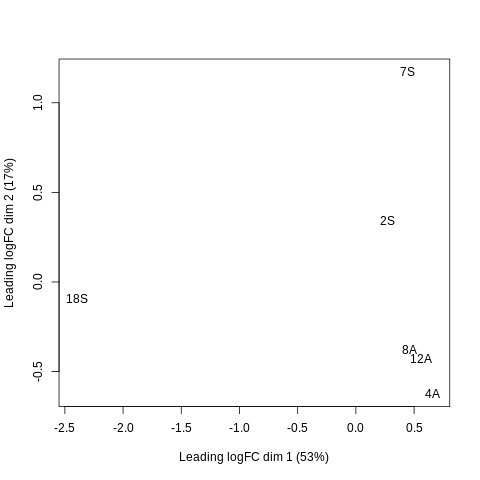

In [9]:
%%R
#@title
## asigna nombres a las columnas
colnames(d_mRNAs) <- gsub(paste0("_",sRNAtype[1],".count"),"",colnames(d_mRNAs))
# muestra la dimension del objeto
dim(d_mRNAs)

In [20]:
%%R
#@title
## filtra por expresion las cuentas en un numero minimo de muestras (3 en este caso porque el numero minimo de muestras en cada grupo)
keep_mRNA_fbe <- filterByExpr(d_mRNAs)
## arma un nuevo objeto con las cuentas filtradas
d_mRNAs_fbe <- d_mRNAs[keep_mRNA_fbe, keep.lib.sizes=FALSE]
## exploramos la nueva dimension del objeto
dim(d_mRNAs_fbe)
dim(d_mRNAs)

[1] 35351     6


In [21]:
%%R
## miramos el objeto filtrado
d_mRNAs_fbe  

An object of class "DGEList"
$samples
             files group description lib.size norm.factors
12A 12A_24nt.count     A     2200mts   869927            1
18S 18S_24nt.count     S     1200mts  1525302            1
2S   2S_24nt.count     S     1200mts  1333854            1
4A   4A_24nt.count     A     2200mts   783079            1
7S   7S_24nt.count     S     1200mts  1005324            1
8A   8A_24nt.count     A     2200mts  1013933            1

$counts
                      Samples
Tags                   12A 18S 2S 4A 7S 8A
  PGSC0003DMG400000001  12  36 11 13 47  7
  PGSC0003DMG400000002  31  46 43 12 31 29
  PGSC0003DMG400000005  10  20 13  3  2 15
  PGSC0003DMG400000008   3  18 31 10 13 16
  PGSC0003DMG400000009  42  17 25 17 12 26
15989 more rows ...



png 
  2 


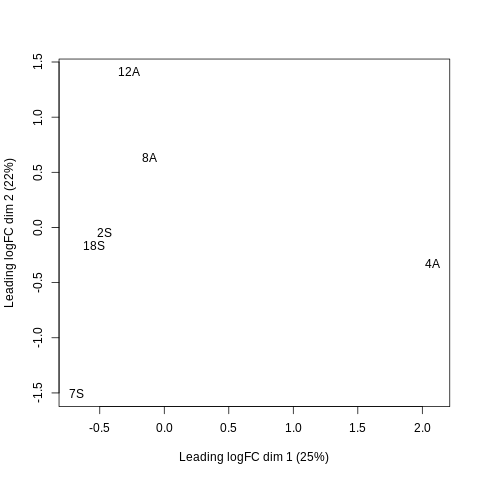

In [22]:
%%R
## calcula un factor de escala para convertir las reads crudas a normalizadas
## un factor de normalizacion <1 indica que un reducido numero de genes tiene alto numero de cuentas las cuales monopolizaron las secuenciacion
d_mRNAs_fbe <- calcNormFactors(d_mRNAs_fbe)
## exploramos el objeto normalizado
#d_mRNAs_fbe[["counts"]]

## plotea en un PCA las distancias entre los perfiles de expresion de las muestras en logFC
## MDS=Multidimensional scaling
plotMDS(d_mRNAs_fbe)
pdf(paste0("/content/plots/",sRNAtype[1],"_PCA.pdf"))
plotMDS(d_mRNAs_fbe)
dev.off()

In [23]:
%%R
#@title
## plotMDS.pdf
# estimo la dispersion comun
d_mRNAs_fbe <- estimateCommonDisp(d_mRNAs_fbe)
# estimo la dispersiion especifica de genes
d_mRNAs_fbe <- estimateTagwiseDisp(d_mRNAs_fbe)
## exploramos las dispersiones
d_mRNAs_fbe

An object of class "DGEList"
$samples
             files group description lib.size norm.factors
12A 12A_24nt.count     A     2200mts   869927    0.9970999
18S 18S_24nt.count     S     1200mts  1525302    1.0011142
2S   2S_24nt.count     S     1200mts  1333854    1.0123801
4A   4A_24nt.count     A     2200mts   783079    0.9882417
7S   7S_24nt.count     S     1200mts  1005324    0.9883158
8A   8A_24nt.count     A     2200mts  1013933    1.0131533

$counts
                      Samples
Tags                   12A 18S 2S 4A 7S 8A
  PGSC0003DMG400000001  12  36 11 13 47  7
  PGSC0003DMG400000002  31  46 43 12 31 29
  PGSC0003DMG400000005  10  20 13  3  2 15
  PGSC0003DMG400000008   3  18 31 10 13 16
  PGSC0003DMG400000009  42  17 25 17 12 26
15989 more rows ...

$common.dispersion
[1] 0.07472956

$pseudo.counts
                      Samples
Tags                         12A      18S        2S        4A       7S
  PGSC0003DMG400000001 14.583025 24.82882  8.054519 17.409685 49.84484
  PGSC000

png 
  2 


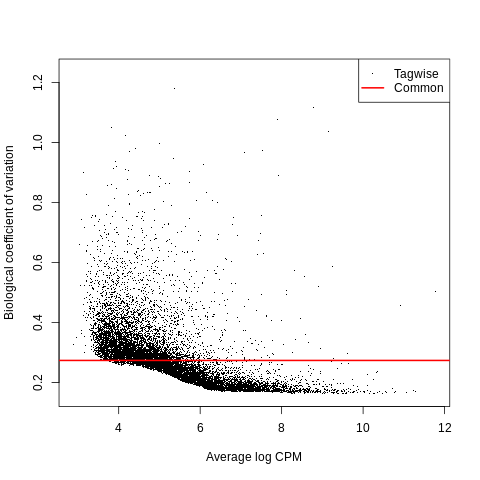

In [24]:
%%R
#@title
## ploteamos el coeficiente de variacion biologica y las dispersiones
plotBCV(d_mRNAs_fbe)
pdf(paste0("/content/plots/",sRNAtype[1],"_dispersion_PCA.pdf"))
plotBCV(d_mRNAs_fbe)
dev.off()

In [25]:
%%R
#plotBCV.pdf
et_mRNAs_fbe <- exactTest(d_mRNAs_fbe, dispersion = "tagwise")
head(et_mRNAs_fbe)


An object of class "DGEExact"
$table
                          logFC   logCPM     PValue
PGSC0003DMG400000001  1.0706041 4.406534 0.08926809
PGSC0003DMG400000002  0.2179162 4.944995 0.60401956
PGSC0003DMG400000005 -0.2549292 3.488519 0.70566009
PGSC0003DMG400000008  0.5696985 3.946620 0.32668918
PGSC0003DMG400000009 -1.1883630 4.597030 0.01170245
PGSC0003DMG400000011  0.4039860 6.552231 0.09798828

$comparison
[1] "A" "S"



In [26]:
%%R
#@title Differentialy Expressed Loci
topDEL<-topTags(et_mRNAs_fbe, n=300000) 
write.table(topDEL,paste0("topTags_",sRNAtype[1],".csv"), quote=FALSE, sep="\t")
head(topDEL)

Comparison of groups:  S-A 
                         logFC   logCPM       PValue          FDR
PGSC0003DMG400024016 -4.165256 6.846765 5.015530e-29 8.021839e-25
PGSC0003DMG400019238  6.562284 5.974486 8.366036e-19 6.690319e-15
PGSC0003DMG400017022  3.689845 7.047451 1.661074e-17 8.855741e-14
PGSC0003DMG400000104  2.838310 5.894576 6.827920e-15 2.730144e-11
PGSC0003DMG400009427  2.123014 7.338596 4.813061e-14 1.539602e-10
PGSC0003DMG400046459 -2.972814 5.441638 6.157174e-14 1.641297e-10


png 
  2 


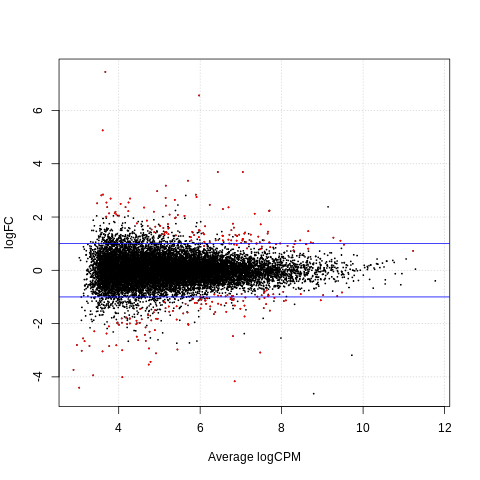

In [27]:
%%R
#@title Escribe el archivo con las cuentas por millon de cada replica

sRNA_cpm<-cpm(d_mRNAs_fbe)[rownames (topDEL),]
write.table(sRNA_cpm,paste0("cpm_",sRNAtype[1],".csv"), quote=FALSE, sep="\t")
  # Muestra cuantos features dieron con diferencias sgnificativas de acumulacion entre ambas condiciones
summary(de <- decideTestsDGE(et_mRNAs_fbe)) 

# Plotea los genes en funcion de su FC y su acumulacion en cpm (los puntos rojos son aquellos que dieron DA estadisticamente significativa)
detags <- rownames(d_mRNAs_fbe)[as.logical(de)]
plotSmear(et_mRNAs_fbe, de.tags=detags)
abline(h=c(-1, 1), col="blue")

#save plot
pdf(paste0("/content/plots/",sRNAtype[1],"_DEL.pdf"))
detags <- rownames(d_mRNAs_fbe)[as.logical(de)]
plotSmear(et_mRNAs_fbe, de.tags=detags)
abline(h=c(-1, 1), col="blue")
dev.off()


<a name="step-3.2"></a>
## Análisis de 24 nts

In [28]:
%%R
#@title
for(t in 2:length(sRNAtype)){
  toKeep<-grep(sRNAtype[t], inFile, value=TRUE)
  subTarget<-targets[toKeep,]
  d_mRNAs <- readDGE(subTarget, path="/content/rawData")
  d_mRNAs
  ## asigna nombres a las columnas
  colnames(d_mRNAs) <- gsub(paste0("_",sRNAtype[t],".count"),"",colnames(d_mRNAs))
  d_mRNAs
  # muestra la dimension del objeto
  dim(d_mRNAs)
  ## filtra por expresion las cuentas en un numero minimo de muestras (3 en este caso porque el numero minimo de muestras en cada grupo)
  keep_mRNA_fbe <- filterByExpr(d_mRNAs)
  ## arma un nuevo objeto con las cuentas filtradas
  d_mRNAs_fbe <- d_mRNAs[keep_mRNA_fbe, keep.lib.sizes=FALSE]
  ## exploramos la nueva dimension del objeto
  dim(d_mRNAs_fbe)
  ## miramos el objeto filtrado
  d_mRNAs_fbe
  ## calcula un factor de escala para convertir las reads crudas a normalizadas
  ## un factor de normalizacion <1 indica que un reducido numero de genes tiene alto numero de cuentas las cuales monopolizaron las secuenciacion
  d_mRNAs_fbe <- calcNormFactors(d_mRNAs_fbe)
  ## exploramos el objeto normalizado
  d_mRNAs_fbe[["counts"]]
    ## plotea en un PCA las distancias entre los perfiles de expresion de las muestras en logFC
  ## MDS=Multidimensional scaling
  pdf(paste0("/content/plots/",sRNAtype[t],"_PCA.pdf"))
  plotMDS(d_mRNAs_fbe)
  dev.off()
  ## plotMDS.pdf
  # estimo la dispersion comun
  d_mRNAs_fbe <- estimateCommonDisp(d_mRNAs_fbe)
  # estimo la dispersiion especifica de genes
  d_mRNAs_fbe <- estimateTagwiseDisp(d_mRNAs_fbe)
  ## exploramos las dispersiones
  d_mRNAs_fbe
  ## ploteamos el coeficiente de variacion biologica y las dispersiones
  pdf(paste0("/content/plots/",sRNAtype[t],"_dispersion_PCA.pdf"))
  plotBCV(d_mRNAs_fbe)
  dev.off()
  #plotBCV.pdf
  et_mRNAs_fbe <- exactTest(d_mRNAs_fbe, dispersion = "tagwise")
  et_mRNAs_fbe
  topDEL<-topTags(et_mRNAs_fbe, n=300000) #Differentialy Expressed Loci
  write.table(topDEL,paste0("topTags_",sRNAtype[t],".csv"), quote=FALSE, sep="\t")
  
  #?
  sRNA_cpm<-cpm(d_mRNAs_fbe)[rownames (topDEL),]
  write.table(sRNA_cpm,paste0("cpm_",sRNAtype[t],".csv"), quote=FALSE, sep="\t")
  
  summary(de <- decideTestsDGE(et_mRNAs_fbe)) 
  
  pdf(paste0("/content/plots/",sRNAtype[t],"_DEL.pdf"))
  detags <- rownames(d_mRNAs_fbe)[as.logical(de)]
  plotSmear(et_mRNAs_fbe, de.tags=detags)
  abline(h=c(-1, 1), col="blue")
  dev.off()
}

<a name="step-3.3"></a>
## Exploramos los datos

En la salida tenemos dos archivos:

**TopTags** y **cpm**

**TopTags** contiene 5 columnas con la información de la expresión (o acumulación diferencial de sRNAs en los "features" (en la caso de los 21-22nt genes, mientras que en los datos de 24nt promotres).
- **ID de los features**: nombre o identificador de cada "feature"
- **logFC**: el log del "fold change" (ratio) para cada "feature" (tag) entre los dos grupos analizados
- **logCPM**: el log del promedio de la abundancia en cpm para cada "feature" (tag) entre los dos grupos analizados 
- **PValue**: el p-valor de la expresión diferencial usando el modelo binomial negativo
- **FDR**: el p-valor ajustado por comparaciones multiples (False Discovery Rate)

**cpm** contiene 7 columnas (en este caso) correspondientes al ID de los "features" y las cuentas por millón (cpm) de cada muestra


Comparamos los archivos TopTags de dos los análisis realizados:

genes con acumulacion diferencial (DA) de sRNAs de 21-22nt vs. promotores con DA de sRNAs de 24nt.

(poner los archivos)

¿Cuál tuvo mas features diferencialmente acumulados con FDR < 0.05?

<a name="step-4"></a>
# OPCIONAL: Guardar en Drive

Opcional. 
Depende del espacio disponible en Drive.

Si desea copiar los datos, **EXCEPTO**  para la primera línea ``#@title``, debe eliminar el numeral (`#`) de cada línea de código.

In [ ]:
%%bash
echo 'Usted está en:'
pwd

In [ ]:
#@title Guardar archivos en el Drive personal
%%bash
#mkdir ../drive/MyDrive/EpiEvo/TP_5
#cd ..
#echo 'Usted está en:'
#pwd
#echo 'Lista de archivos en colab:'
#ls
#cp -r {plots,rawData,results} drive/MyDrive/EpiEvo/TP_5/
#echo 'Lista de archivos en TP_5 en su drive:'
#ls drive/MyDrive/EpiEvo/TP_5/